# Chapter 7 - Exercise 1
### Author: *John Benedick Estrada*
---
**Exercise:** In Chapter 7 we showed that the Rule 18 CA produces a fractal.
Can you find other rules that produce fractals?  For each one,
estimate its fractal dimension.

Note: the `Cell1D` object in `Cell1D.py` does not wrap around from the left edge to the right, which creates some artifacts at the boundaries.  You might want to use `Wrap1D`, which is a child class of `Cell1D` that wraps around.  It is also defined in `Cell1D.py`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils import decorate
from scipy.stats import linregress
from Cell1D import Cell1D, draw_ca

##### Functions for counting cells and computing fractal dimensions
Source: https://github.com/AllenDowney/ThinkComplexity2/blob/master/notebooks/chap07.ipynb

In [2]:
# `count_cells` in Cell 34 of `chap07.ipynb`
def count_cells(rule, n=500):
    """Create a 1-D CA and count cells.
    
    rule: int rule number
    n: number of steps
    """
    ca = Cell1D(rule, n)
    ca.start_single()
    
    res = []
    for i in range(1, n):
        cells = np.sum(ca.array)
        res.append((i, i**2, cells))
        ca.step()
        
    return res


# `test_fractal` in Cell 35 of `chap07.ipynb`
def test_fractal(rule, ylabel='Number of Cells'):
    """Compute the fractal dimension of a rule.
    
    rule: int rule number
    ylabel: string
    """
    res = count_cells(rule)
    steps, steps2, cells = zip(*res)

    options = dict(linestyle='dashed', color='gray', alpha=0.7)
    plt.plot(steps, steps2, label='d=2', **options)
    plt.plot(steps, cells, label='rule=%d' % rule)
    plt.plot(steps, steps, label='d=1', **options)

    decorate(xscale='log', yscale='log',
             xlabel='Time Steps',
             ylabel=ylabel,
             xlim=[1, 600], loc='upper left')

    for ys in [cells]:
        params = linregress(np.log(steps), np.log(ys))
        print(params[0])

### Rule 110

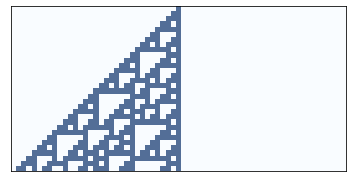

1.9253914777050334


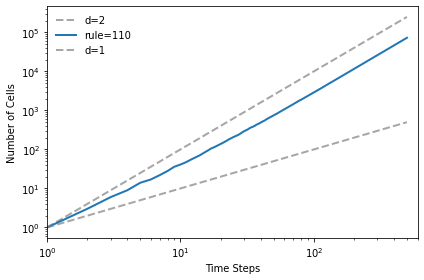

In [3]:
draw_ca(110)
plt.show()
test_fractal(110)

### Rule 30

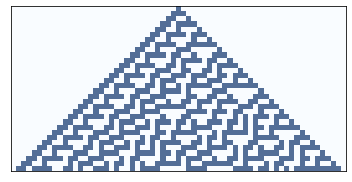

1.9448302510520263


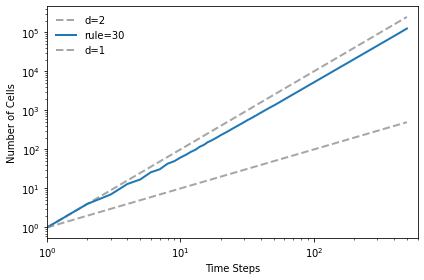

In [4]:
draw_ca(30)
plt.show()
test_fractal(30)